# Model training: Random Forest

We use Random Forest to obtain our prediction model. As opposed to previous strategy, we also do cross-validation on the tfidf features.

In [2]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline

### Loading the data 

In [3]:
path = '/Users/louispht/Dropbox/git_projects/news_classifier/Data cleaning/Pickles/'

# X_train
with open(path + 'X_train_noact.pickle', 'rb') as data:
    X_train = pickle.load(data)
    
# X_test
with open(path + 'X_test_noact.pickle', 'rb') as data:
    X_test = pickle.load(data)

# y_train
with open(path + 'y_train_noact.pickle', 'rb') as data:
    y_train = pickle.load(data)
    
# y_test
with open(path + 'y_test_noact.pickle', 'rb') as data:
    y_test = pickle.load(data)

In [4]:
X_train.shape

(8641,)

In [5]:
y_train.shape

(8641,)

In [6]:
X_test.shape

(1130,)

In [7]:
y_test.shape

(1130,)

### Defining the pipeline and do RandomSearchCV

In [7]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(encoding='utf-8',
                        stop_words=None,
                        lowercase=False,
                        norm='l2',
                        sublinear_tf=True)),
                     ('rf', RandomForestClassifier())])

In [8]:
# Create the random grid
random_grid = {'rf__n_estimators': [100,300,500,800,1200],
               'rf__criterion': ['gini', 'entropy'],
               'rf__min_samples_leaf': [1,2,5,10],
               'rf__min_samples_split': [1,2,5,10,15,100],
               'rf__max_depth':[5,8,15,25,30],
               'tfidf__ngram_range':((1,1), (1,2)),
               'tfidf__max_features':[100, 300, 500, 1000, 5000],
               'tfidf__max_df': (0.5,0.75,1.0)
             }

In [9]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=pipeline,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   verbose=1, 
                                   random_state=42)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
   

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/anaconda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/anaconda/lib/python3.6/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/lib/python3.6/site-packages/joblib/paral

RandomizedSearchCV(estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(lowercase=False,
                                                              sublinear_tf=True)),
                                             ('rf', RandomForestClassifier())]),
                   n_iter=50,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': [5, 8, 15, 25, 30],
                                        'rf__min_samples_leaf': [1, 2, 5, 10],
                                        'rf__min_samples_split': [1, 2, 5, 10,
                                                                  15, 100],
                                        'rf__n_estimators': [100, 300, 500, 800,
                                                             1200],
                                        'tfidf__max_df': (0.5, 0.75, 1.0),
                                        'tfidf__max_feature

In [10]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is: % .2f" % random_search.best_score_)

The best hyperparameters from Random Search are:
{'tfidf__ngram_range': (1, 1), 'tfidf__max_features': 5000, 'tfidf__max_df': 0.75, 'rf__n_estimators': 100, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 10, 'rf__max_depth': 30, 'rf__criterion': 'gini'}

The mean accuracy of a model with these hyperparameters is:  0.91


In [11]:
#Save the best model
best_rf = random_search.best_estimator_
best_rf

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(lowercase=False, max_df=0.75,
                                 max_features=5000, sublinear_tf=True)),
                ('rf',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=10,
                                        min_samples_split=10))])

In [12]:
best_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(lowercase=False, max_df=0.75,
                                 max_features=5000, sublinear_tf=True)),
                ('rf',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=10,
                                        min_samples_split=10))])

In [13]:
#predictions 
rf_pred = best_rf.predict(X_test)

#### Saving the model

In [14]:
d = {
     'Model': 'RandomForest',
     'Training Set Accuracy': accuracy_score(y_train, best_rf.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, rf_pred)
}

df_models_rf = pd.DataFrame(d, index=[0])

In [15]:
df_models_rf

,Model,Training Set Accuracy,Test Set Accuracy
0,RandomForest,0.943988,0.889381


In [16]:
with open('Models/best_rf_pipeline.pickle', 'wb') as output:
    pickle.dump(best_rf, output)
    
with open('Models/df_models_rf_pipeline.pickle', 'wb') as output:
    pickle.dump(df_models_rf, output)

### Performance Analysis 

In [18]:
# Classification report
categories = {'affaires':0, 'sports':3, 'international':2, 'culture':1}
print("Classification report")
print(classification_report(y_test,rf_pred, target_names=categories))

Classification report
               precision    recall  f1-score   support

     affaires       0.86      0.86      0.86       243
       sports       0.93      0.83      0.87       274
international       0.78      0.95      0.86       220
      culture       0.97      0.92      0.94       393

     accuracy                           0.89      1130
    macro avg       0.88      0.89      0.88      1130
 weighted avg       0.90      0.89      0.89      1130



In [25]:
df_X_train = pd.DataFrame(data = X_train)
df_X_test = pd.DataFrame(data = X_test)
df_y_train = pd.DataFrame(data = y_train)
df_y_test = pd.DataFrame(data = y_test)

In [26]:
X = pd.concat([df_X_train, df_X_test], axis = 0)
y = pd.concat([df_y_train, df_y_test], axis = 0)
df_all_le = pd.concat([X,y], axis = 1)

In [28]:
df_all_le.columns = [cleaned_content]

,cleaned_content,0
0,chanteux oper mariejos lord laiss tomb c...,1
1,paisibl vall agricol où polici regl chican...,2
2,si québec domin industr canadien aéronaut f...,0
3,avril derni valer cecchin viceprésident gesti...,0
4,président prend mannequin quelqu heur in...,0
...,...,...
1125,montréal – philipp lapris reçoit humor compli...,1
1126,paris | group facebook annonc lund avoir ban...,1
1127,cour suprêm canad accept jug si blagu crue...,1
1128,jérémy gabriel préfer demand appel mik war...,1


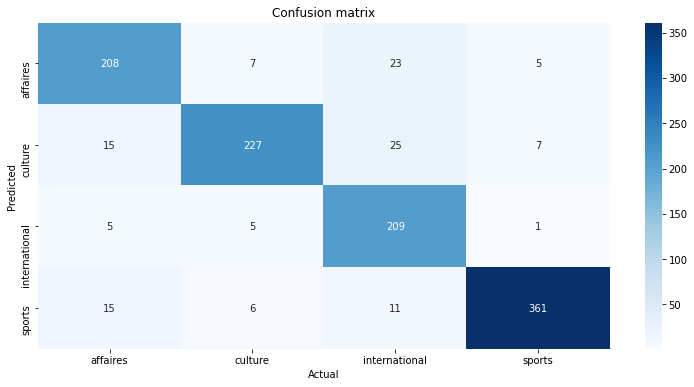

In [20]:
#Confusion matrix
#aux_df = df_all_le[['category', 'label_enc']].drop_duplicates().sort_values('category')
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=['affaires', 'culture', 'international', 'sports'],
            yticklabels=['affaires', 'culture', 'international', 'sports'],
            cmap="Blues",
            fmt = '.3g')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()